In [69]:
# Save this file in the name of the ML model you are using
import pandas as pd
import numpy as np
import os

In [70]:
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "icml_face_data.csv" # Insert file name
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [71]:
data_path = ["C:/Users/Hicham el Marzgioui/Desktop/AI - Emotion Rec/data"] # Insert data file path
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data.drop(' Usage', axis=1, inplace=True)
data = data.drop(index=WHITE_IMAGES, axis=0)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [72]:
data.shape

(35875, 2)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35875 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35875 non-null  int64 
 1    pixels  35875 non-null  object
dtypes: int64(1), object(1)
memory usage: 840.8+ KB


In [106]:
data.describe()

,emotion
count,35875.000000
mean,3.323819
std,1.873466
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [73]:
from collections import Counter

print('number of samples: ', len(data))
print('number of unique samples: ', len(data[data.columns[1]].unique()))
print('keys: ', list(data.keys()))
print('\n')

for i in range(len(CLASS_NAMES)):
    print(CLASS_NAMES[i] + ' ', ((data['emotion'].value_counts())[i]))


number of samples:  35875
number of unique samples:  34033
keys:  ['emotion', ' pixels']


Angry  4946
Disgust  547
Fear  5120
Happy  8988
Sad  6076
Surprise  4001
Neutral  6197


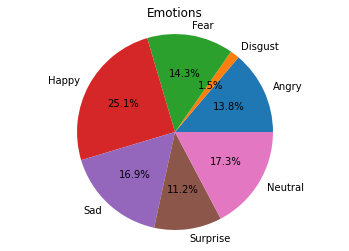

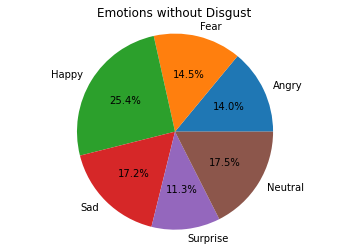

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions without Disgust')


plt.show()

In [75]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(35328, 2)

In [76]:
def data_X_y(data):
    # Split data into X & y
    X = data.drop('emotion', axis='columns')
    y = data['emotion']

    # Reshapes X into 3D array
    X = [pixels.split(" ") for pixels in data_exclude_disgust[" pixels"]]
    X = np.array(X)
    X = X.astype("int32")
    X = np.array([image.reshape(48, 48) for image in X])
    X = X/255.0
    X = X.reshape(len(X), 48, 48, 1)
    
    return X,y

In [107]:
X,y = data_X_y(data_exclude_disgust)

print(X.max())
print(X.shape)
print(X.min(), X.max())
print(y.shape)

1.0
(35328, 48, 48, 1)
0.0 1.0
(35328,)


In [108]:
from skimage.io import imread
from skimage.transform import resize

def show_samples(X):
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(1, len(labels))
    fig.set_size_inches(15,4)
    fig.tight_layout()

    for ax, label in zip(axes, labels):
        data_label_index_list = data.index[data['emotion'] == label].tolist()

        ax.imshow(X[data_label_index_list[1]]) # Change this value to see different images 
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])


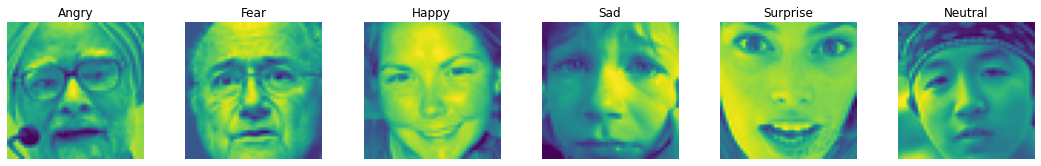

In [109]:
show_samples(X)

In [110]:
from skimage.feature import hog
from skimage.io import imread

def show_hog_samples(X):
    labels = np.unique(data_exclude_disgust['emotion'])

    fig, axes = plt.subplots(1, len(labels))
    fig.set_size_inches(15,4)
    fig.tight_layout()

    for ax, label in zip(axes, labels):

        data_label_index_list = data.index[data['emotion'] == label].tolist()
        
        # The values below can be changes to decrease of increase the amount of details
        emotion_hog, emotion_hog_img = hog(
        X[data_label_index_list[1]], # Make this value the same as the above one to view the corresponding hog images
        pixels_per_cell=(2,2),
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')
        
        ax.imshow(emotion_hog_img)
        ax.axis('off')
        ax.set_title(CLASS_NAMES[label])

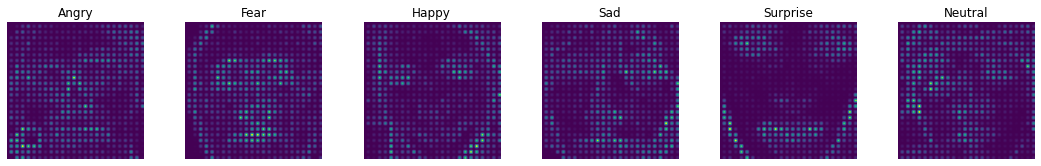

In [111]:
show_hog_samples(X)

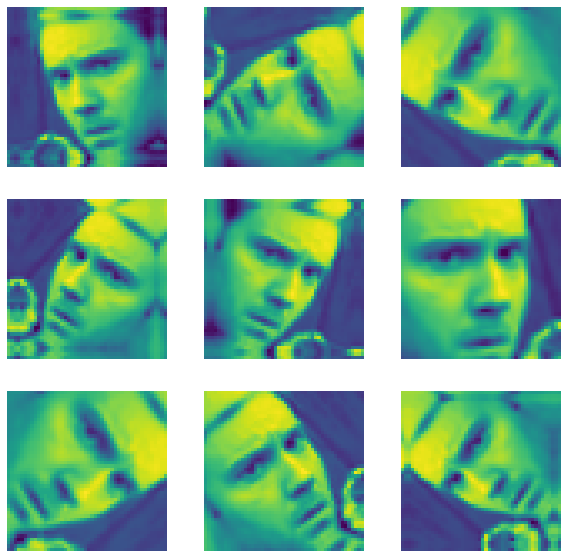

In [125]:
import tensorflow as tf
from tensorflow.keras import layers

# For more you can visit:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

image = tf.expand_dims(X[0], 0) # X[0] can be changed to view different images
# print(image.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [ ]:
# TODO: data augmentation images opslaan naar het dataset

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])


In [83]:
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import skimage

def hogify_X(X):
    hogify = HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2,2), 
        orientations=9, 
        block_norm='L2-Hys'
    )

    X_hog = hogify.fit_transform(X)

    return X_hog

In [84]:
X_hog = hogify_X(X) # This can be used for fitting a model faster with less data, test it with the other data samples
print(X_hog.shape)

(35328, 144)


In [85]:
from builtins import range
from builtins import object

def reshape_X(X):
    num_training = X.shape[0]
    mask = list(range(num_training))
    X_reshape = X[mask]

    # Reshape the image data into rows
    X_reshape = np.reshape(X, (X.shape[0], -1))
    
    return X_reshape

In [86]:
X_reshape = reshape_X(X)

In [87]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE()
ros = RandomOverSampler()
rus = RandomUnderSampler()

X_smote, y_smote = ros.fit_resample(X_reshape,y) # This data is oversampled with smote
X_ros, y_ros = ros.fit_resample(X_reshape,y) # This data is oversampled
X_rus, y_rus = rus.fit_resample(X_reshape,y) # This data is undersampled

print(y_ros.value_counts())
print(y_rus.value_counts())
print(y_smote.value_counts())

0    8988
2    8988
3    8988
4    8988
5    8988
6    8988
Name: emotion, dtype: int64
0    4001
2    4001
3    4001
4    4001
5    4001
6    4001
Name: emotion, dtype: int64
0    8988
2    8988
3    8988
4    8988
5    8988
6    8988
Name: emotion, dtype: int64


In [104]:
# Check the unique rows in the array
# print(len(np.unique(X_smote, axis=0)))
# print(len(X_smote))
# print(len(np.unique(X_ros, axis=0)))
# print(len(X_ros))
# print(len(np.unique(X_rus, axis=0)))
# print(len(X_rus))

33575
53928
33575
53928
22753
24006


In [88]:
def plot_train_test_distribution(y,loc='left', relative=True):
    width = 0.35
    CLASS_NAMES_WITHOUT_DISGUST = ["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, CLASS_NAMES_WITHOUT_DISGUST, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    plt.suptitle('relative amount of images per type')
    

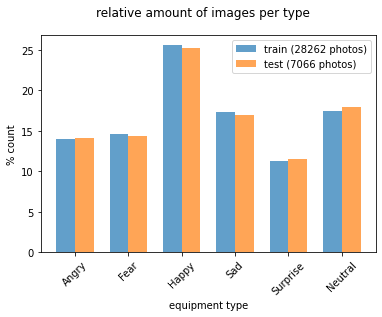

In [89]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X_reshape, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train, loc='left')
plot_train_test_distribution(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

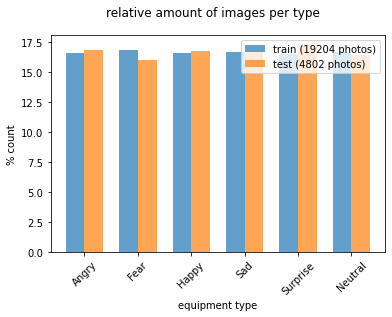

In [90]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    X_rus, 
    y_rus, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_rus, loc='left')
plot_train_test_distribution(y_test_rus, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_rus)), 
    'test ({0} photos)'.format(len(y_test_rus))
]);

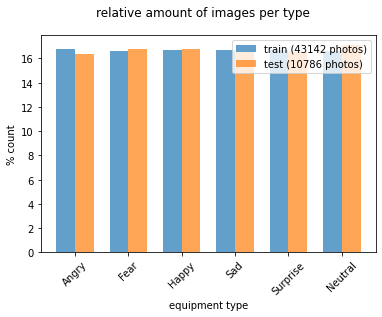

In [91]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(
    X_ros, 
    y_ros, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_ros, loc='left')
plot_train_test_distribution(y_test_ros, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_ros)), 
    'test ({0} photos)'.format(len(y_test_ros))
]);

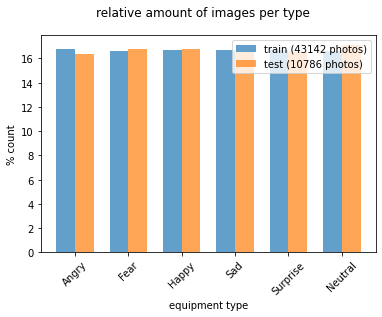

In [92]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, 
    y_smote, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

plot_train_test_distribution(y_train_smote, loc='left')
plot_train_test_distribution(y_test_smote, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train_smote)), 
    'test ({0} photos)'.format(len(y_test_smote))
]);

In [93]:
# These are the X & y that can be used for fitting a ML model
X_train, X_test, y_train, y_test
X_train_rus, X_test_rus, y_train_rus, y_test_rus
X_train_ros, X_test_ros, y_train_ros, y_test_ros
X_train_smote, X_test_smote, y_train_smote, y_test_smote
X_hog, y # This does still have to be ros, rus or smote for balance and then split in train & test

(array([[0.20994851, 0.25951439, 0.25951439, ..., 0.07401445, 0.05536962,
         0.12145643],
        [0.14957843, 0.23828312, 0.23828312, ..., 0.17031329, 0.06625583,
         0.17081747],
        [0.27776439, 0.31917925, 0.31917925, ..., 0.00551356, 0.01571592,
         0.03699339],
        ...,
        [0.09830001, 0.12822649, 0.09877445, ..., 0.03969169, 0.04229507,
         0.06040726],
        [0.28066807, 0.2134875 , 0.03435179, ..., 0.02950318, 0.00908859,
         0.03940427],
        [0.15730592, 0.24617036, 0.24617036, ..., 0.07038143, 0.03730191,
         0.08617894]]),
 0        0
 1        0
 2        2
 3        4
 4        6
         ..
 35882    6
 35883    3
 35884    0
 35885    3
 35886    2
 Name: emotion, Length: 35328, dtype: int64)

In [94]:
### TODO: maken van een functie die als input een path voor een jpg of png neemt en als output een pixel array geeft (Xander).